# Teoria Estatística da Estimação

A Teoria da Amostragem permite que tenhamos informações sobre a população a partir de amostras retiradas. Entretanto, há diversas dificuldades na **_estimação dos parâmetros populacionais_**  (média, desvio, etc) a partir das **_estatísticas amostrais_** : como determinar o tamanho da amostra, que seja representativo da população? Qual a confiabilidade dos resultados encontrados?

## Estimativas imparciais

Se a média amostral foi igual ao parâmetro populacional correspondente, a estatística é denominada **estimador imparcial** do parâmetro e, se não ocorrer, será um **estimador parcial**. Os valores encontrados correspondentes são chamados de **estimativas imparciais ou parciais**, respectivamente. 

## Estimativas eficientes

Se as distribuições amostrais de duas estatísticas têm a mesma média, a estatística de menor variância é denominada **_estimador eficiente da média_**. As demais estimativas são denominadas simplesmente estimadores eficientes.

### 1º Exercício

Faça um programa que simule o lançamento de um dado honesto. Para tando, considerem:
a) 100 lançamentos
b) 1.000 lançamentos
c) 5.000 lançamentos
d) 10.000 lançamentos
e) 100.000 lançamentos

Calcule a média e o desvio padrão para cada um dos eventos de lançamentos. Plote também o histograma para cada caso. São iguais ou com uma diferença significativa?
Indique se a média e o desvio padrão são estimadores imparciais e eficientes, considerando que a população são representados pelos valores encontrados para a alternativa (e)

In [21]:
import random
import matplotlib.pyplot as plt
from random import randint
import statistics

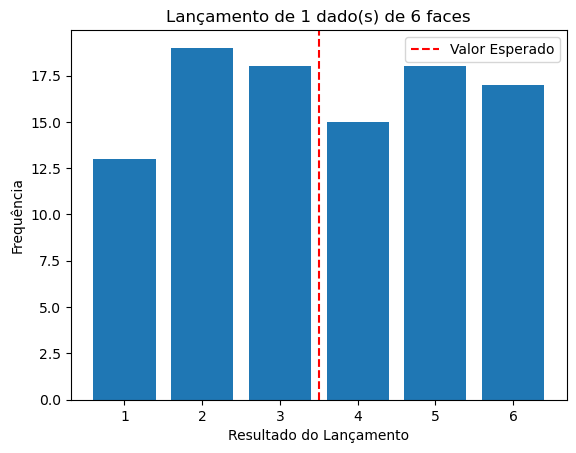

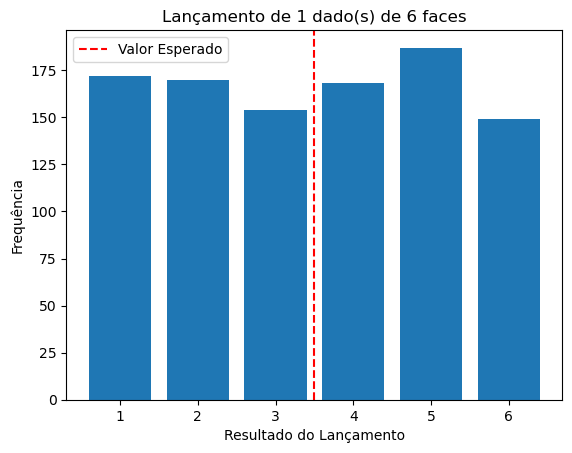

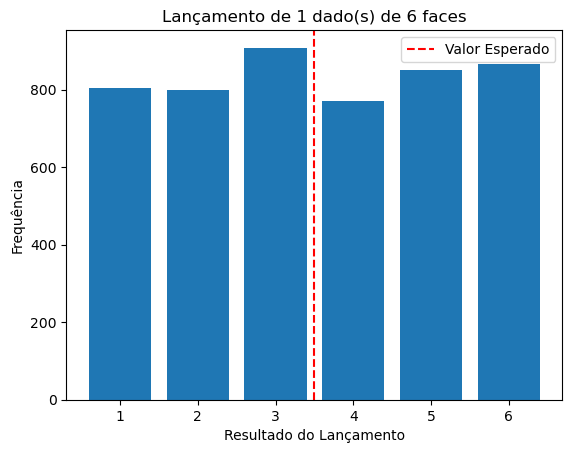

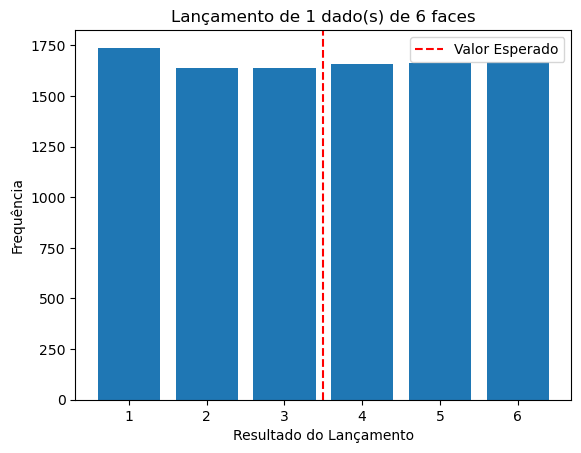

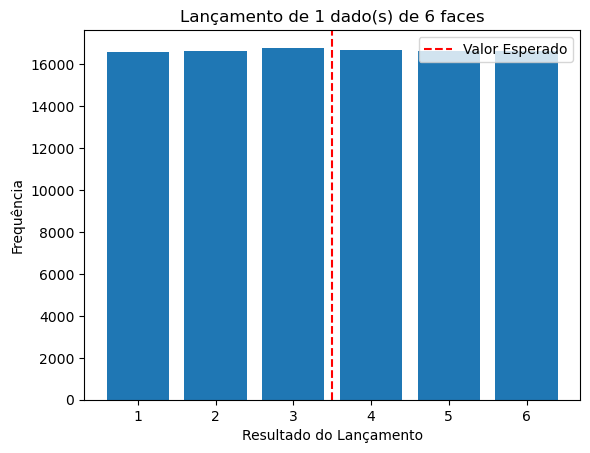

In [24]:
def roll(num_faces, num_rolls):
    return sum(random.randint(1, num_faces) for _ in range(num_rolls))

def launch(num_sim, num_faces, num_rolls):
    resultados = [0] * (num_rolls * num_faces)
    for _ in range(num_sim):
        resultado = roll(num_rolls, num_faces)
        resultados[resultado - 1] += 1
    return resultados

def calcular_valor_esperado(num_rolls, num_faces):
    return (num_rolls * (num_faces + 1)) / 2

def dice_rolls(num_rolls, num_faces, resultados):
    valor_esperado = calcular_valor_esperado(num_rolls, num_faces)
    # Criação do Gráfico
    plt.bar(range(1, num_rolls * num_faces + 1), resultados)
    plt.axvline(valor_esperado, color='r', linestyle='--', label='Valor Esperado')
    plt.xlabel('Resultado do Lançamento')
    plt.ylabel('Frequência')
    plt.title(f'Lançamento de {num_rolls} dado(s) de {num_faces} faces')
    plt.legend()
    plt.show()

# Teste de Simulação A
num_sim = 100
num_rolls = 1
num_faces = 6

results_100 = launch(num_sim, num_rolls, num_faces)
dice_rolls(num_rolls, num_faces, results_100)

# Teste de Simulação B
num_sim = 1000
num_rolls = 1
num_faces = 6

results_1000 = launch(num_sim, num_rolls, num_faces)
dice_rolls(num_rolls, num_faces, results_1000)

# Teste de Simulação C
num_sim = 5000
num_rolls = 1
num_faces = 6

results_5000 = launch(num_sim, num_rolls, num_faces)
dice_rolls(num_rolls, num_faces, results_5000)

# Teste de Simulação D
num_sim = 10000
num_rolls = 1
num_faces = 6

results_10000 = launch(num_sim, num_rolls, num_faces)
dice_rolls(num_rolls, num_faces, results_10000)

# Teste de Simulação E
num_sim = 100000
num_rolls = 1
num_faces = 6

results_100000 = launch(num_sim, num_rolls, num_faces)
dice_rolls(num_rolls, num_faces, results_100000)

## Estimativas do intervalo de confiança

Sejam $\mu_S$ e $\sigma_S$ a média e o desvio padrão (erro padrão) da distribuição amostral de uma estatística S. Então, se a distribuição amostral de $S$ é aproximadamente normal (o que se tem verificado ser verdade quando o tamanho da amostra é  $ N \ge 30 $), pode se esperar que encontre-se uma estatística amostral real, $S$, situada nos intervalos de $\mu_S - \sigma_S$ a $\mu_S + \sigma_S$ ou $\mu_S - 2\sigma_S$ a $\mu_S + 2\sigma_S$ ou ainda $\mu_S - 3\sigma_S$ a $\mu_S + 3\sigma_S$, aproximadamente, em 68,27%, 95,45% e 99,73% de vezes, respectivamente.

De modo equivalente, pode-se espera, ou **_estar confiante_** de encontrar $\mu_S$ nos intervalos $S - \sigma_S$ a $S + \sigma_S$, ou $S - 2\sigma_S$ a $S + 2\sigma_S$, ou de $S - 3\sigma_S$ a $S + 3\sigma_S$, aproximadamente, em 68,27, 95,45
e 99,73% de vezes, respectivamente.

Por esse motivo, esses intervalos serão denominados, respectivamente, **_intervalos de confiança_** de 68,27, 95,45
e 99,73% para avaliação de $\mu_S$. Os números extremos desses intervalos $(S\pm \sigma_S, S\pm 2\sigma_S, S\pm 3\sigma_S)$ são então denominados limites de confiança de 68,27, 95,45 e 99,73% e, algumas vezes **_limites fiduciais_**.

De modo semelhante, $S\pm 1,96\sigma_S$ e $S\pm 2,58\sigma_S$ são limites de confiança de 95 e 99% (ou 0,95 e 0,99) para $S%. A porcentagem de confiança é, frequentemente denominada **_nível de confiança_**. Os números 1,96 e 2,58 são chamados **_coeficientes de confiança_** ou **_valores críticos_** representados $z_c$. A tabela abaixo dá os valores de $z_c$ correspondentes a vários níveis de confiança utilizados na prática


**Tabela 1 -** Níveis de confiança mais utilizados na prática
Limite de confiança, $z_c$ | 99,73% | 99% | 98% | 96% | 95,45% | 95% | 90% | 80% | 68,27% | 50%
:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:
| |3,0|2,58|2,33|2,05|2,00|1,96|1,645|1,28|1,0|0,6745|

### Relembrando um dos Problemas

1) De 50.000 válvulas fabricadas por uma companhia retira-se uma amostra de 400 válvulas e obtém-se a vida média de 800 horas e o desvio padrão de 100 horas. **(a)** qual o intervalo de confiança de 99% para a vida média da população? **(b)** Com que confiança poderia se dizer que a vida média é 800 $\pm $ 0,98? **(c)** Que tamanho deve ter a amostra para que seja de 95% a confiança na estimativa 800 $\pm $ 7,84?


In [1]:
import scipy.stats as stats
import numpy as np

amostra = 400
media = 800
desvio = 100/(amostra**0.5)

graus_liberdade = amostra - 1

intervalo_confianca = stats.t.interval(0.95, graus_liberdade, loc=media, scale = desvio)
print(intervalo_confianca)

z1 = 0.98/desvio
c1 = stats.norm.cdf(z1)
print(c1)

z2 = 7.84/desvio
c2 = stats.norm.cdf(z2)
print(c2)

(790.170363520396, 809.829636479604)
0.5776949170016281
0.941559433825788
